11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1000/1000 [==============================] - 6s 6ms/step - loss: 0.1997 - accuracy: 0.9402
Epoch 2/10
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0783 - accuracy: 0.9752
Epoch 3/10
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0531 - accuracy: 0.9827
Epoch 4/10
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0396 - accuracy: 0.9873
Epoch 5/10
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0309 - accuracy: 0.9899
Epoch 6/10
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0262 - accuracy: 0.9913
Epoch 7/10
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0221 - accuracy: 0.9926
Epoch 8/10
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0187 - accuracy: 0.9937
Epoch 9/10
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0186 - accuracy: 0.9940
Epoch 10/10
313/3

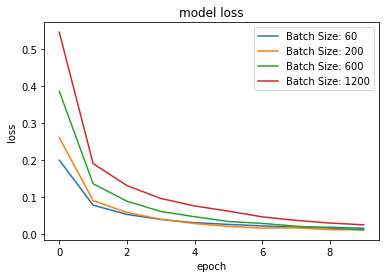


Classification for modified dataset:

Epoch 1/10
1000/1000 [==============================] - 9s 9ms/step - loss: 0.3384 - accuracy: 0.8955
Epoch 2/10
1000/1000 [==============================] - 9s 9ms/step - loss: 0.1564 - accuracy: 0.9509
Epoch 3/10
1000/1000 [==============================] - 9s 9ms/step - loss: 0.1209 - accuracy: 0.9619
Epoch 4/10
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0973 - accuracy: 0.9702
Epoch 5/10
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0861 - accuracy: 0.9729
Epoch 6/10
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0724 - accuracy: 0.9769
Epoch 7/10
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0670 - accuracy: 0.9786
Epoch 8/10
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0613 - accuracy: 0.9800
Epoch 9/10
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0584 - accuracy: 0.9814
Epoch 10/10
625/625 [======================

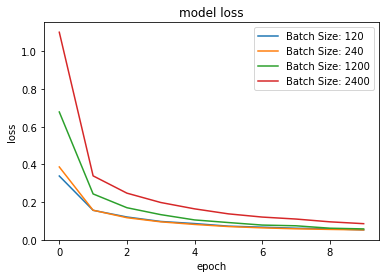

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#building the model using input and output specification
def builtModel():

  classes = 10
  layer_size = 256
  n_layer = 2

  #Build the model object
  model = tf.keras.models.Sequential()

  #Flatten Layer to convert 28*28(2-D) to 784(1-D) input
  model.add(tf.keras.layers.Flatten())

  # Build the input and the hidden layers
  for i in range(n_layer):
    model.add(tf.keras.layers.Dense(layer_size, activation=tf.nn.relu))

  # Build the output layer
  model.add(tf.keras.layers.Dense(classes, activation=tf.nn.softmax))

  return model



#training the model with the input set
def trainModel(model,x_train,y_train,batch_size):

  n_epoch = 10

  #compiling the model
  model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

  #training the model
  details = model.fit(x=x_train, y=y_train, epochs= n_epoch,batch_size = batch_size,shuffle = True)
  return details.history['loss']



#predicting the label for test set and calculating the accuracy
def predict(model,x_test,y_test,batch_size):

  test_loss, test_acc = model.evaluate(x=x_test, y=y_test)
  print()
  print("The accuracy acheived for the batch size",batch_size,":","{:.2f}".format(test_acc*100),"%")
  print()


def classifier(x_train,y_train,x_test,y_test,batch):
  batch_details = []
  legend= []

  for batch_size in batch:
    model = builtModel()
    batch_details.append(trainModel(model,x_train,y_train,batch_size))
    predict(model,x_test,y_test,batch_size)
    legend.append("Batch Size: "+str(batch_size))

  for details in batch_details:
    plt.plot(details)
  
  plt.legend(legend, loc='upper right')
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.show()


#loading the dataset from MNIST consists of handwritten digits with labels
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

#flipping the pixels of images
x_train_flipped = 255- x_train
x_test_flipped = 255- x_test

#normalising the images to the range[0,1]
x_train = x_train/255
x_test = x_test/255
x_train_flipped = x_train_flipped/255
x_test_flipped = x_test_flipped/255

#combining the image with modified image
x_train_modified = np.concatenate((x_train,x_train_flipped))
y_train_modified = np.concatenate((y_train,y_train))
x_test_modified = np.concatenate((x_test,x_test_flipped))
y_test_modified = np.concatenate((y_test,y_test))

batch = [60,200,600,1200]
classifier(x_train,y_train,x_test,y_test,batch)
print()
print("Classification for modified dataset:")
print()
batch = [120,240,1200,2400]
classifier(x_train_modified,y_train_modified,x_test_modified,y_test_modified,batch)
